In [1]:
import torchvision
import torchvision.transforms as tf
s = 1
size = 224
color_jitter = torchvision.transforms.ColorJitter(
    0.8 * s, 0.8 * s, 0.8 * s, 0.2 * s
)
train_transform = {
    "cutout": torchvision.transforms.RandomErasing(p=1),
    "flip": torchvision.transforms.RandomHorizontalFlip(1),  # with 0.5 probability
    "color_jitter": torchvision.transforms.RandomApply([color_jitter], p=1),
    "grayscale": torchvision.transforms.RandomGrayscale(1),
    "blur": torchvision.transforms.RandomApply([torchvision.transforms.GaussianBlur(11)], p=1),
}


In [2]:
sample = torchvision.io.read_image("media/turtle.jpg")
sample = tf.Resize((size, size))(sample)


/Users/levscaut/miniconda3/envs/uoft/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


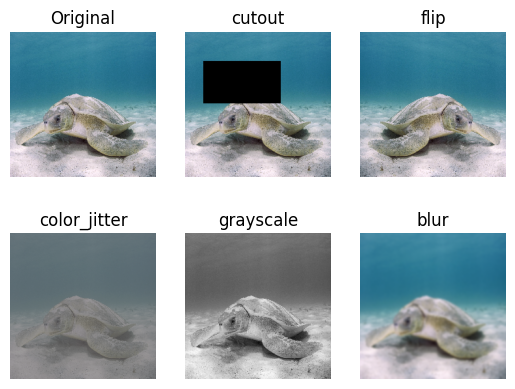

In [3]:
import matplotlib.pyplot as plt
plt.subplot(2, 3, 1)
plt.imshow(sample.permute(1, 2, 0))
plt.axis("off")
plt.title("Original")
for i, transform_method in enumerate(train_transform):
    sample_np = train_transform[transform_method](sample).numpy()
    plt.subplot(2, 3, i+2)
    plt.axis("off")
    plt.title(transform_method)
    plt.imshow(sample_np.transpose(1, 2, 0))
plt.show()